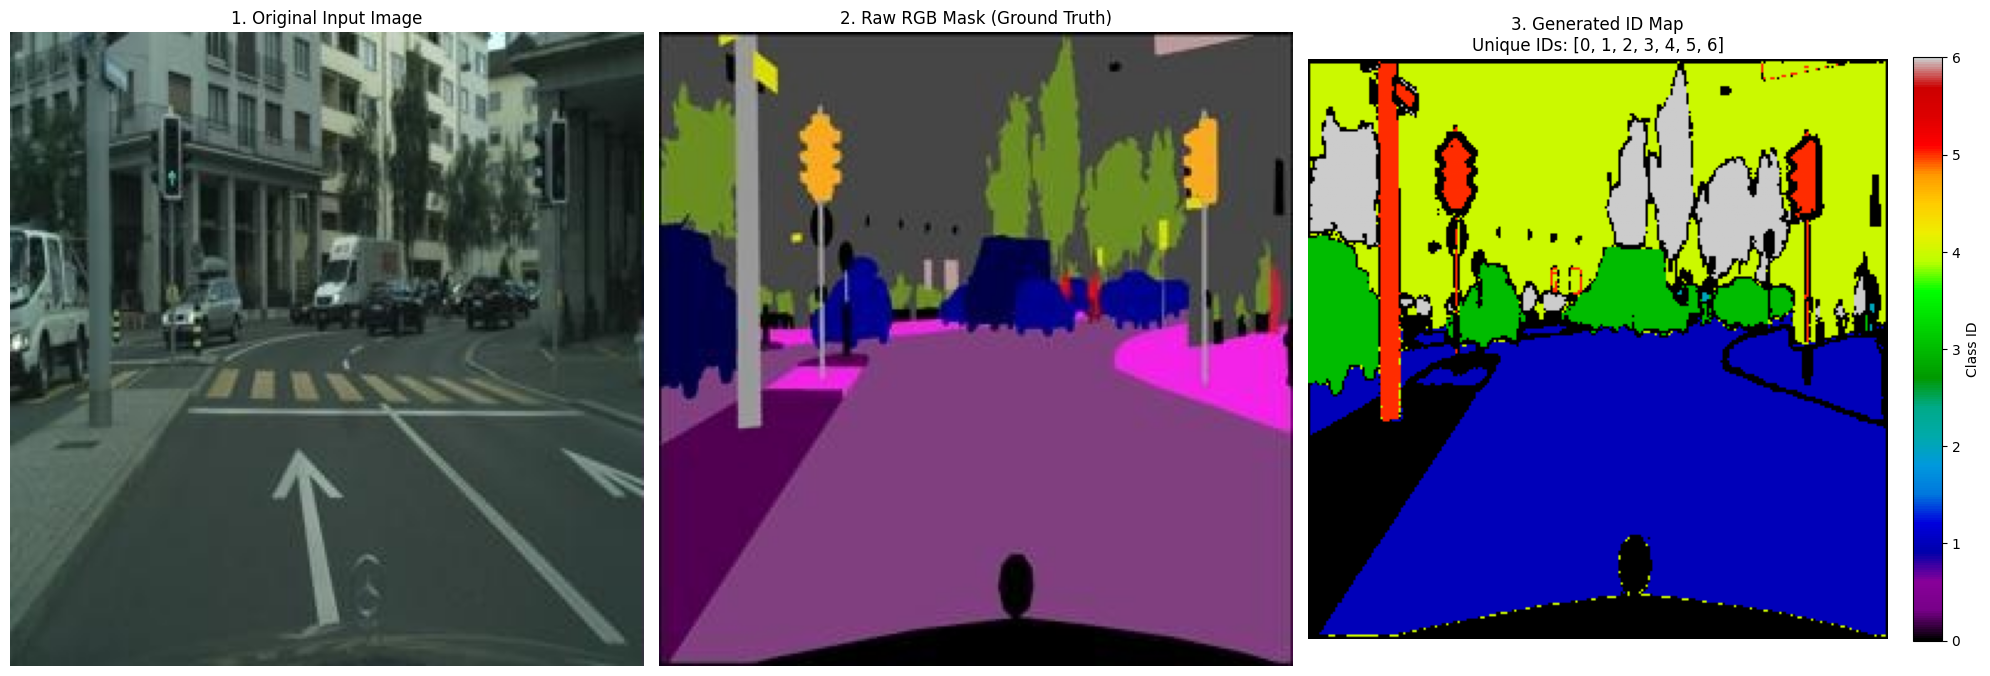

In [8]:
import sys
import os
import torch
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# 1. Setup Project Paths
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

# 2. Import Custom Dataset Logic
from src.dataset import CityscapesKaggleDataset

# 3. Initialize Dataset
# Ensure this path points correctly to your data folder
DATA_DIR = '../data/raw/cityscapes_data'
ds = CityscapesKaggleDataset(root_dir=DATA_DIR, split='train')

# 4. Extract Data for Comparison
# Get the raw file path to see the 'before' state
index = 10
img_path = os.path.join(ds.split_dir, ds.image_filenames[index])
combined_raw = np.array(Image.open(img_path).convert("RGB"))

# Manual split for raw visualization
raw_input_side = combined_raw[:, :256, :]
raw_mask_side = combined_raw[:, 256:, :]

# Get the processed tensors from your Dataset class for the 'after' state
img_t, mask_t = ds[index]

# 5. Visualize the 3-Panel Comparison
fig, ax = plt.subplots(1, 3, figsize=(20, 7))

# Panel 1: Original Input (The photo)
ax[0].imshow(raw_input_side)
ax[0].set_title("1. Original Input Image")
ax[0].axis('off')

# Panel 2: Raw RGB Mask (The original colors in the JPG)
ax[1].imshow(raw_mask_side)
ax[1].set_title("2. Raw RGB Mask (Ground Truth)")
ax[1].axis('off')

# Panel 3: Encoded Class ID Map (What the model actually learns)
# We use 'nipy_spectral' to make the different ID values (0-4) pop out
im3 = ax[2].imshow(mask_t.numpy(), cmap='nipy_spectral')
ax[2].set_title(f"3. Generated ID Map\nUnique IDs: {torch.unique(mask_t).tolist()}")
ax[2].axis('off')

# Add a colorbar to explain the IDs
fig.colorbar(im3, ax=ax[2], fraction=0.046, pad=0.04, label="Class ID")

plt.tight_layout()
plt.show()

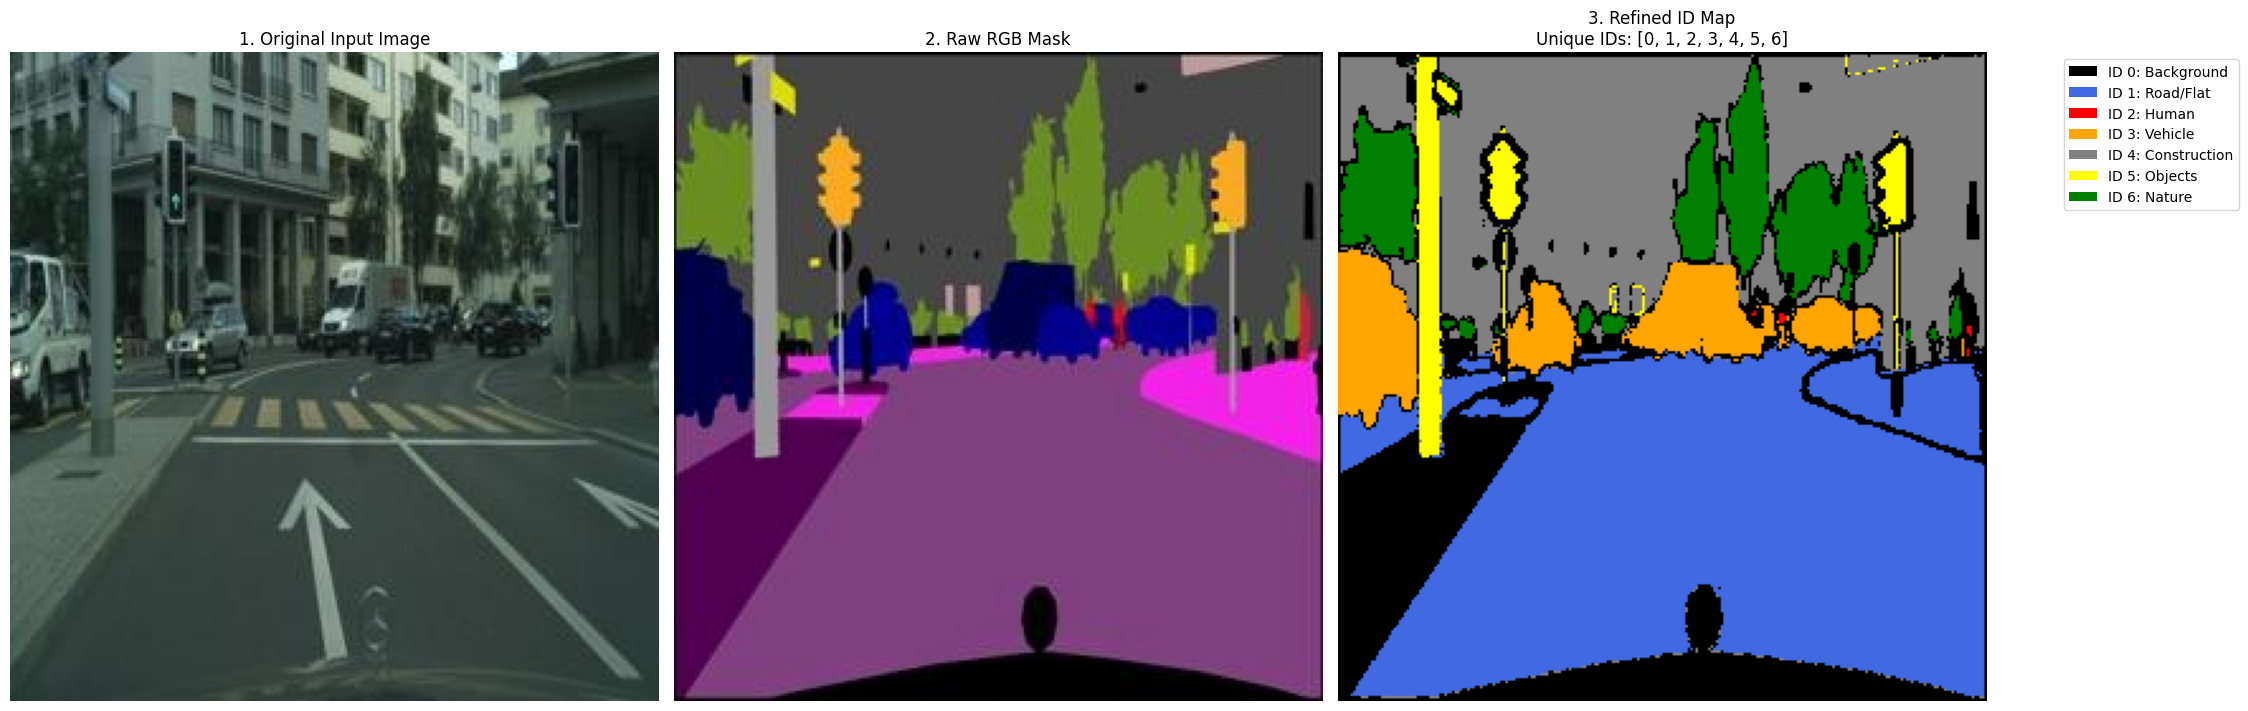

In [9]:
import matplotlib.colors as mcolors
from matplotlib.patches import Patch

# 1. Define the 7 colors for your classes (0-6)
# Background, Road/Flat, Human, Vehicle, Construction, Objects, Nature
class_colors = ['black', 'royalblue', 'red', 'orange', 'gray', 'yellow', 'green']
class_names = ['Background', 'Road/Flat', 'Human', 'Vehicle', 'Construction', 'Objects', 'Nature']
custom_cmap = mcolors.ListedColormap(class_colors)

# 2. Create the 3-Panel Visualization
fig, ax = plt.subplots(1, 3, figsize=(22, 8))

# Panel 1 & 2: (Keep your existing code for Raw Input and Raw Mask)
ax[0].imshow(raw_input_side)
ax[0].set_title("1. Original Input Image")
ax[1].imshow(raw_mask_side)
ax[1].set_title("2. Raw RGB Mask")

# Panel 3: The Refined ID Map with Custom Colors
im3 = ax[2].imshow(mask_t.numpy(), cmap=custom_cmap, vmin=0, vmax=6)
ax[2].set_title(f"3. Refined ID Map\nUnique IDs: {torch.unique(mask_t).tolist()}")

# 3. Create and Add the Legend
legend_elements = [Patch(facecolor=class_colors[i], label=f'ID {i}: {class_names[i]}') 
                   for i in range(len(class_colors))]
ax[2].legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.4, 1.0))

# 4. Final Formatting
for a in ax: a.axis('off')
plt.tight_layout()
plt.show() # <--- This prevents the <matplotlib.legend...> text output